In [55]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [56]:
transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize( (0.5, 0.5, 0.5), (0.5, 0.5, 0.5) )
])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(
    root = './data',
    train = True,
    download = True,
    transform = transforms
)
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size = batch_size,
    shuffle = True,
    num_workers = 2
)

testset = torchvision.datasets.CIFAR10(
    root = './data',
    train = False,
    download = True,
    transform = transforms
)
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size = batch_size,
    shuffle = True,
    num_workers = 2
)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [57]:
import torch.nn as nn
import torch.nn.functional as F

In [58]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward( self, x ):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

net = Net()

In [59]:
## 최적환 함수 정의
import torch.optim as optim
criterion = nn.CrossEntropyLoss() ## 손실 함수
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

In [60]:
for epoch in range(2):   # 데이터셋을 수차례 반복

	running_loss = 0.0
	for i, data in enumerate(trainloader, 0):
		# [inputs, labels]의 목록인 data로부터 입력을 받은 후;
		inputs, labels = data

		# 변화도(Gradient) 매개변수를 0으로 만들고
		optimizer.zero_grad()

		# 순전파 + 역전파 + 최적화를 한 후
		outputs = net(inputs)
		loss = criterion(outputs, labels)
		loss.backward()
		optimizer.step()

		# 통계를 출력
		running_loss += loss.item()
		if i % 2000 == 1999:
			print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
			running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.216
[1,  4000] loss: 1.878
[1,  6000] loss: 1.695
[1,  8000] loss: 1.603
[1, 10000] loss: 1.532
[1, 12000] loss: 1.495
[2,  2000] loss: 1.426
[2,  4000] loss: 1.394
[2,  6000] loss: 1.377
[2,  8000] loss: 1.342
[2, 10000] loss: 1.313
[2, 12000] loss: 1.288
Finished Training


In [61]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [62]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

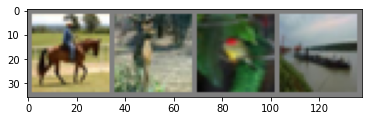

<generator object <genexpr> at 0x7fd525986c10>


In [63]:
dataiter = iter(testloader)
images, labels = dataiter.next()

def imshow(img):
	img = img / 2 + 0.5     # unnormalize
	npimg = img.numpy()
	plt.imshow(np.transpose(npimg, (1, 2, 0)))
	plt.show()

imshow(torchvision.utils.make_grid(images))
print(f'{classes[labels[j]]:5s}' for j in range(batch_size))

In [64]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [65]:
outputs = net(images)

In [66]:
_, pred = torch.max(outputs, 1)

print('Pred: ', ' '.join(f'{classes[pred[j]]:5s}' for j in range(4)))

Pred:  horse bird  bird  plane


In [68]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data

        outputs = net(images)

        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 55 %
Accuracy of the network on the 10000 test images: 55 %


In [70]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
	for data in testloader:

		images, labels = data
		outputs = net(images)

		_, predictions = torch.max(outputs, 1)

		for label, prediction in zip(labels, predictions):
			if label == prediction:
				correct_pred[classes[label]] += 1
			total_pred[classes[label]] += 1


for classname, correct_count in correct_pred.items():
	accuracy = 100 * float(correct_count) / total_pred[classname]
	print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 68.2 %
Accuracy for class: car   is 74.3 %
Accuracy for class: bird  is 34.8 %
Accuracy for class: cat   is 31.5 %
Accuracy for class: deer  is 51.5 %
Accuracy for class: dog   is 43.9 %
Accuracy for class: frog  is 66.5 %
Accuracy for class: horse is 64.2 %
Accuracy for class: ship  is 58.7 %
Accuracy for class: truck is 63.2 %
